In [1]:
import os
import numpy as np
import pandas as pd
import io

In [2]:
# Get every file into one list with the full filepaths
root_files = os.listdir('trees_all')
sub_files_to_flatten = [[f'{r}/{f}' for f in os.listdir(f'trees_all/{r}')] for r in root_files]
#Flatten list of files into one list
sub_files = [f'trees_all/{item}' for sublist in sub_files_to_flatten for item in sublist]

In [3]:
# Trying to look at file structure
# Total number of files
print(len(sub_files))
# Total number of files with the -noaa extension
print(len([sf for sf in sub_files if ('-noaa' in sf)]))
# Total number of files without the -noaa extension
print(len([sf for sf in sub_files if not ('-noaa' in sf)]))

9644
4775
4869


In [4]:
xt_set = {sf[:-9] for sf in sub_files if ('-noaa' in sf)}
normal_set = {sf[:-4] for sf in sub_files if not ('-noaa' in sf)}
# Number of files without matching sets of -noaa and non -noaa files
print(len(xt_set ^ normal_set))
# Files without matching sets
print(xt_set ^ normal_set)

110
{'trees_all/europe/swed341', 'trees_all/north_america/tn029', 'trees_all/north_america/wi055', 'trees_all/north_america/wi050', 'trees_all/europe/finl095', 'trees_all/europe/norw019', 'trees_all/north_america/wi051', 'trees_all/north_america/cana636', 'trees_all/europe/finl082', 'trees_all/europe/finl093', 'trees_all/europe/swed340', 'trees_all/north_america/sd024', 'trees_all/north_america/wi035', 'trees_all/north_america/wi029', 'trees_all/north_america/wi030', 'trees_all/north_america/ok043', 'trees_all/north_america/wi032', 'trees_all/europe/swed346', 'trees_all/north_america/wi039', 'trees_all/north_america/or056', 'trees_all/north_america/wi016', 'trees_all/europe/finl092', 'trees_all/europe/norw023', 'trees_all/north_america/wi058', 'trees_all/north_america/ca728', 'trees_all/europe/finl087', 'trees_all/north_america/wi047', 'trees_all/north_america/wi044', 'trees_all/north_america/wi026', 'trees_all/north_america/wi033', 'trees_all/europe/finl084', 'trees_all/europe/norw028

Seems for the most part, the files come in pairs and follow the format: {first 4 letters of country}{number}.rwl and {first 4 letters of country}{number}-noaa.rwl
- Files w/o -noaa ext: first 3 lines have info on the tree, + other metadata
- Files with -noaa ext: Many lines of text starting with "#" containing info about the data, then a line with column labels, the first of which is usually something with age

In [5]:
# Example of file with -noaa extension
# print(sub_files[0])
# file1 = open(sub_files[0],'r')
# print(file1.read())
# file1.close()

# Only keep noaa files
sub_files = [file for file in sub_files if 'noaa' in file]

In [6]:
# Example of file without -noaa extension
print(sub_files[1])
file1 = open(sub_files[1],'r')
print(file1.read())
file1.close()

trees_all/africa/alge002-noaa.rwl
# Touchan - Pinus Nigra Reserve - PINI - ITRDB ALGE002
#-----------------------------------------------------------------------
#               World Data Service for Paleoclimatology, Boulder
#                                  and
#                     NOAA Paleoclimatology Program
#             National Centers for Environmental Information (NCEI)
#-----------------------------------------------------------------------
# Template Version 3.0
# Encoding: UTF-8
# NOTE: Please cite original publication, online resource and date accessed when using these data,
# If there is no publication information, please cite investigator, title, online resource and date accessed.
#
# Online_Resource: https://www.ncdc.noaa.gov/paleo/study/9919
#             Description: NOAA Landing Page of study
# Online_Resource: https://www1.ncdc.noaa.gov/pub/data/paleo/treering/measurements/africa/alge002-noaa.rwl
#    Description: Raw Measurements - NOAA Template File
# Online_R

Hopefully not having matching sets isn't gonna be a problem if we just take all the data from the files with the -nooa extension and put it in one dataframe, and then take all the files with the extension and put that in a separate dataframe and find some way to merge them(maybe drop the ones without matching pairs?), but it would be good to know what that data actually is. 

In [23]:
# Attempt at cleaning a file w/ noaa xt
# Finds a line that starts with the word age and saves all the data
# below it (separated with newlines)
age_line = 0
with open('trees_all/europe/brit004-noaa.rwl','r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        if lines[i].startswith('age'):
            print(i)
            age_line = i
            break
    extracted = ' '.join(lines[age_line:])
    print(extracted)

95
age_CE	Q 3333_raw	Q 3334_raw	Q 3335_raw	Q 3336_raw	Q 3337_raw	Q 3338_raw	Q 3340_raw	Q 3341_raw	Q 3342_raw	Q 3343_raw	Q 3345_raw	Q 3347_raw	Q 3348_raw	
 1811 	NaN	NaN	NaN	NaN	NaN	NaN	125	NaN	NaN	NaN	NaN	NaN	NaN	
 1812	NaN	NaN	NaN	NaN	NaN	NaN	135	NaN	NaN	NaN	NaN	NaN	NaN	
 1813	NaN	NaN	NaN	NaN	NaN	NaN	130	NaN	NaN	NaN	NaN	NaN	NaN	
 1814	NaN	NaN	NaN	NaN	NaN	71	98	NaN	NaN	NaN	NaN	NaN	NaN	
 1815	NaN	NaN	NaN	NaN	NaN	51	133	NaN	NaN	NaN	NaN	NaN	NaN	
 1816	NaN	NaN	NaN	NaN	NaN	34	131	NaN	NaN	NaN	NaN	NaN	NaN	
 1817	NaN	NaN	NaN	NaN	NaN	27	60	NaN	NaN	NaN	NaN	NaN	NaN	
 1818	76	NaN	NaN	NaN	NaN	34	82	NaN	NaN	NaN	NaN	NaN	NaN	
 1819	115	NaN	NaN	NaN	NaN	47	113	NaN	NaN	NaN	NaN	NaN	NaN	
 1820	72	NaN	NaN	NaN	NaN	60	91	NaN	NaN	NaN	NaN	NaN	NaN	
 1821	91	NaN	NaN	NaN	NaN	55	100	NaN	NaN	NaN	NaN	NaN	NaN	
 1822	116	100	NaN	NaN	NaN	46	75	NaN	NaN	NaN	NaN	NaN	NaN	
 1823	136	133	160	NaN	NaN	54	100	NaN	NaN	NaN	NaN	NaN	NaN	
 1824	111	65	100	NaN	NaN	59	103	NaN	NaN	NaN	NaN	NaN	NaN	
 1825	99	40	77	NaN	NaN	50	83	NaN	NaN	Na

In [24]:
# Putting data from with a file w/ noaa extenstion in a dataframe 
data = io.StringIO(extracted)
df_test = pd.read_csv(data, sep="\t")
df_test.head()

,age_CE,Q 3333_raw,Q 3334_raw,Q 3335_raw,Q 3336_raw,Q 3337_raw,Q 3338_raw,Q 3340_raw,Q 3341_raw,Q 3342_raw,Q 3343_raw,Q 3345_raw,Q 3347_raw,Q 3348_raw,Unnamed: 14
0,1811,NaN,NaN,NaN,NaN,NaN,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1812,NaN,NaN,NaN,NaN,NaN,NaN,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1813,NaN,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1814,NaN,NaN,NaN,NaN,NaN,71.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1815,NaN,NaN,NaN,NaN,NaN,51.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Ignore but might be useful later
# Cleaning one without
with open(sub_files[1],'r') as f2:
    lines2 = f2.readlines()
d = [[w.strip() for w in textline.split(' ') if (w != '')] for textline in lines2[3:]]
# No idea what the columns should be
df2 = pd.DataFrame(d)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,#,and,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,#,NOAA,Paleoclimatology,Program,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,#,National,Centers,for,Environmental,Information,(NCEI),None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,#---------------------------------------------...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,#,Template,Version,3.0,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [10]:
# Avg tree rings width for all non - NaN data per year
# mean() function doesn't count NaN values in the calculation
df_test['Avg'] = df_test.drop('age_CE',axis=1).mean(axis=1)
df_test.head()

,age_CE,LMO01A_raw,LMO01B_raw,LMO02A_raw,LMO02B_raw,LMO04A_raw,LMO05A_raw,LMO05B_raw,LMO06A_raw,LMO06B_raw,...,LMO17A_raw,LMO17B_raw,LMO18A_raw,LMO18B_raw,LMO19A_raw,LMO19B_raw,LMO20A_raw,LMO20B_raw,Unnamed: 34,Avg
0,1697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.0
1,1698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0
2,1699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0
3,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
4,1701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.0


In [15]:
df_test['Avg'].tolist()

[237.0,
 183.0,
 193.0,
 192.0,
 232.0,
 303.0,
 321.0,
 278.0,
 225.0,
 247.0,
 267.0,
 265.0,
 308.0,
 260.0,
 339.0,
 255.0,
 240.0,
 280.0,
 198.0,
 237.0,
 224.0,
 259.0,
 249.0,
 204.0,
 275.0,
 145.0,
 322.0,
 338.0,
 289.0,
 264.0,
 224.0,
 338.0,
 208.0,
 224.0,
 181.0,
 229.0,
 194.0,
 215.0,
 292.0,
 289.5,
 220.0,
 194.5,
 234.5,
 275.0,
 291.0,
 272.0,
 338.0,
 284.5,
 248.0,
 182.5,
 221.0,
 196.5,
 245.0,
 353.6666666666667,
 237.33333333333334,
 289.0,
 334.3333333333333,
 303.0,
 289.6666666666667,
 176.0,
 197.33333333333334,
 227.0,
 238.66666666666666,
 261.0,
 242.25,
 263.25,
 257.25,
 249.75,
 274.5,
 258.1666666666667,
 200.33333333333334,
 217.5,
 211.5,
 207.5,
 197.5,
 196.83333333333334,
 175.83333333333334,
 155.16666666666666,
 174.16666666666666,
 226.33333333333334,
 250.33333333333334,
 234.0,
 219.42857142857142,
 186.0,
 246.14285714285714,
 164.71428571428572,
 196.0,
 193.71428571428572,
 188.71428571428572,
 122.85714285714286,
 151.28571428571428,

In [11]:
# Extracting info from metadata
file_name = sub_files[0]
north_lat = south_lat = west_lon = east_lon = 0
north_lat_ind = len('# Northernmost_Latitude:')
species = ''
earliest_year,latest_year = 0,0
organism_group = 0 #?
elevation = 0
with open(file_name,'r') as f:
    lines = f.read().splitlines()
    for i in range(len(lines)):
        if lines[i].startswith('# Northernmost_Latitude:'):
            north_lat = float(lines[i].split(' ')[2])
        elif lines[i].startswith('# Southernmost_Latitude:'):
            south_lat = float(lines[i].split(' ')[2])
        elif lines[i].startswith('# Easternmost_Longitude:'):
            east_lon = float(lines[i].split(' ')[2])
        elif lines[i].startswith('# Westernmost_Longitude:'):
            west_lon = float(lines[i].split(' ')[2])
        elif lines[i].startswith('# Species_Name:'):
            species = lines[i].split(': ')[1]
        elif lines[i].startswith('# Earliest_Year:'):
            earliest_year = int(lines[i].split(': ')[1])
        elif lines[i].startswith('# Most_Recent_Year:'):
            latest_year = int(lines[i].split(': ')[1])
        elif lines[i].startswith('# Elevation:'):
            try:
                elevation = float(lines[i].split(': ')[1])
            except ValueError:
                elevation = np.nan
        
lat = (north_lat + south_lat)/2
lon = (east_lon + west_lon)/2

print(file_name)
print(organism_group)
print(lat)
print(lon)
print(species)
print(earliest_year)
print(latest_year)
print(elevation)

trees_all/africa/alge001-noaa.rwl
0
36.45
4.1
Cedrus atlantica (Endl.) Manetti ex Carriere
1697
2005
1520.0


In [12]:
cols = ['year','avg_tree_ring_width','lat','long','elevation','tree_species']
feats = [1,2,3,4,5,6]
df_final = pd.DataFrame(columns=cols)
#df_final.append(,ignore_index=True)

In [13]:
df_final = df_final.append({x:y for x in cols for y in feats},ignore_index=True)
df_final.head()

,year,avg_tree_ring_width,lat,long,elevation,tree_species
0,6,6,6,6,6,6


In [26]:
import pandas as pd
from pathlib import Path


tree_path = Path('../old/tree_data_splits')
dfs = []
for i in range(1, 6):
    file_name = f'clean_tree_data{i}000.csv'
    df = pd.read_csv(tree_path / file_name, low_memory=False)
    dfs.append(df)

combined_df = pd.concat(dfs)
combined_df.to_csv('tree_data.csv', index=False)


In [16]:
combined_df

,year,avg_tree_ring_width,lat,long,elevation,tree_species,organism_group
0,969,164.500000,51.75041,-0.34223,NaN,Quercus spp. L.,0
1,970,188.500000,51.75041,-0.34223,NaN,Quercus spp. L.,0
2,971,139.000000,51.75041,-0.34223,NaN,Quercus spp. L.,0
3,972,173.000000,51.75041,-0.34223,NaN,Quercus spp. L.,0
4,973,221.000000,51.75041,-0.34223,NaN,Quercus spp. L.,0
...,...,...,...,...,...,...,...
367667,2010,768.894737,55.94931,160.19910,743.0,Larix gmelinii (Rupr.) Kuzen.=L.kurulensis(Max...,0
367668,2011,644.921053,55.94931,160.19910,743.0,Larix gmelinii (Rupr.) Kuzen.=L.kurulensis(Max...,0
367669,2012,684.868421,55.94931,160.19910,743.0,Larix gmelinii (Rupr.) Kuzen.=L.kurulensis(Max...,0
367670,2013,735.578947,55.94931,160.19910,743.0,Larix gmelinii (Rupr.) Kuzen.=L.kurulensis(Max...,0


In [22]:
import shapely
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# combined_df = combined_df[combined_df['long'] > 0]
# combined_df = combined_df[combined_df['long'] < 361] # and combined_df['long'] < 361]
combined_df = combined_df[combined_df['lat'] > -91] 
combined_df = combined_df[combined_df['lat'] < 91]# and combined_df['lat'] < 91]
combined_df['long_formatted'] = combined_df['long'] - 360
combined_df

,year,avg_tree_ring_width,lat,long,elevation,tree_species,organism_group,long_formatted
85,1511,484.000000,37.42000,30.2800,1601.0,Pinus nigra J.F. Arnold,0,-329.7200
86,1512,370.000000,37.42000,30.2800,1601.0,Pinus nigra J.F. Arnold,0,-329.7200
87,1513,299.000000,37.42000,30.2800,1601.0,Pinus nigra J.F. Arnold,0,-329.7200
88,1514,382.000000,37.42000,30.2800,1601.0,Pinus nigra J.F. Arnold,0,-329.7200
89,1515,267.000000,37.42000,30.2800,1601.0,Pinus nigra J.F. Arnold,0,-329.7200
...,...,...,...,...,...,...,...,...
367667,2010,768.894737,55.94931,160.1991,743.0,Larix gmelinii (Rupr.) Kuzen.=L.kurulensis(Max...,0,-199.8009
367668,2011,644.921053,55.94931,160.1991,743.0,Larix gmelinii (Rupr.) Kuzen.=L.kurulensis(Max...,0,-199.8009
367669,2012,684.868421,55.94931,160.1991,743.0,Larix gmelinii (Rupr.) Kuzen.=L.kurulensis(Max...,0,-199.8009
367670,2013,735.578947,55.94931,160.1991,743.0,Larix gmelinii (Rupr.) Kuzen.=L.kurulensis(Max...,0,-199.8009


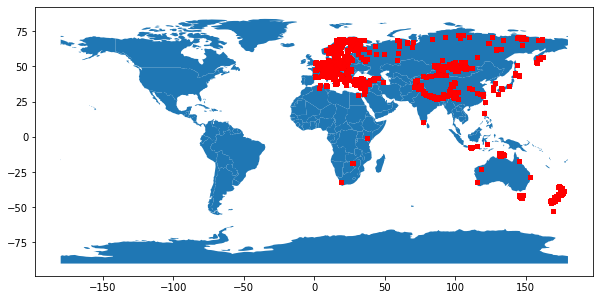

In [25]:
geometry = [Point(xy) for xy in zip(combined_df['long'], 
                                    combined_df['lat'])]

gdf = GeoDataFrame(combined_df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);